## Introducing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# import the dataset
exchange_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')

In [4]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [5]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [6]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 5699 rows and 41 columns in the dataset. And there are many null values of some columns.

[Iceland krona ], [Romanian leu ], [Turkish lira ] are float. Other columns are all object.

## Data cleaning

In this project, I will conduct on the exchange rate between the euro and the American renminbi. 

In [12]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [13]:
# isolate the Time and the US_dollar columns
euro_to_dollar=exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.5775     1
0.9573     1
1.1152     1
0.9310     1
1.4358     1
Name: US_dollar, Length: 3528, dtype: int64

In [14]:
# drop the '-' characters
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Visualize the evolution of the euro-dollar exchange rate

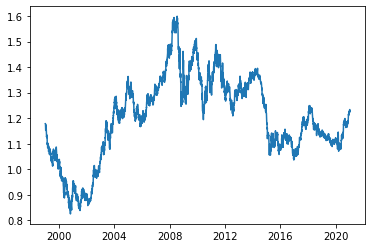

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

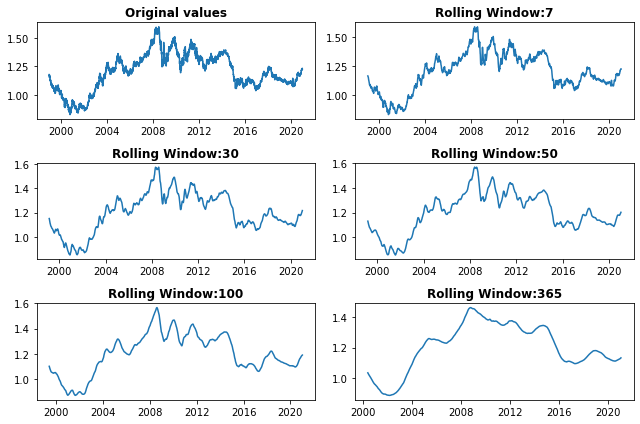

In [16]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

In [17]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5694,2021-01-04,1.2296,1.211170
5695,2021-01-05,1.2271,1.212530
5696,2021-01-06,1.2338,1.213987
5697,2021-01-07,1.2276,1.215357


### Coming up with an idea

Here are a few story ideas for our data:

1. We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

2. We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

3. We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

### Coronavirus pandemic 

In [18]:
# get the dataset
covid=euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year==2020)]
before_covid=euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year>=2016)
     &(euro_to_dollar['Time'].dt.year<=2019)]
    

In [19]:
covid.head()

,Time,US_dollar,rolling_mean
5437,2020-01-02,1.1193,1.109237
5438,2020-01-03,1.1147,1.109470
5439,2020-01-06,1.1194,1.109920
5440,2020-01-07,1.1172,1.110190
5441,2020-01-08,1.1115,1.110380


In [20]:
before_covid

,Time,US_dollar,rolling_mean
4415,2016-01-04,1.0898,1.081743
4416,2016-01-05,1.0746,1.081937
4417,2016-01-06,1.0742,1.082307
4418,2016-01-07,1.0868,1.083030
4419,2016-01-08,1.0861,1.083947
...,...,...,...
5432,2019-12-23,1.1075,1.106783
5433,2019-12-24,1.1080,1.107000
5434,2019-12-27,1.1153,1.107490
5435,2019-12-30,1.1189,1.108130


In [21]:
# add fivethirtyeight style
import matplotlib.style as style
import datetime
style.use('fivethirtyeight')

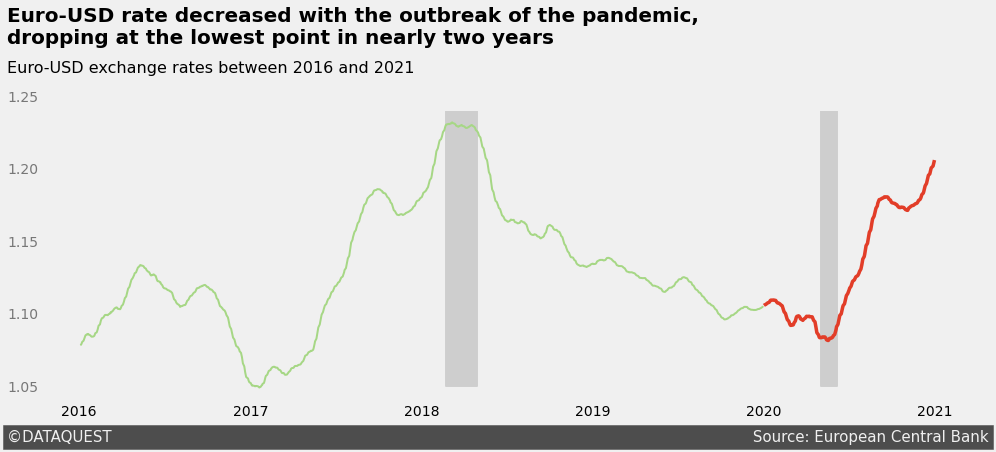

In [35]:
# add the plot
fig,ax=plt.subplots(figsize=(15,5))

# hightlight the 2020 period data
ax.plot(covid['Time'],covid['rolling_mean'],
       linewidth=3.5, color='#e23d28')

# plot the 2016-2019 period
ax.plot(before_covid['Time'],before_covid['rolling_mean'],
       linewidth=2, color='#A6D785')

# highlight the lowest point in covid period
ax.axvspan(xmin=datetime.date(2020, 4, 30), xmax=datetime.date(2020, 6, 5), ymin=0.05,
           alpha=0.3, color='grey')

# highlight the peak point before covid
ax.axvspan(xmin=datetime.date(2018, 2, 20), xmax=datetime.date(2018, 4, 30), ymin=0.05,
           alpha=0.3, color='grey')

# reset the yticks
ax.set_yticklabels([])

y = 1.05   
for rate in ['1.05', '1.10', '1.15', '1.20', '1.25']:
    ax.text(datetime.date(2015, 8, 1), y, rate, alpha=0.5, fontsize=14)
    y += 0.05


## add a title and a subtitle    
ax.text(datetime.date(2015, 8, 1), 1.29, "Euro-USD rate decreased with the outbreak of the pandemic, \ndropping at the lowest point in nearly two years",
        weight='bold', size=20)
ax.text(datetime.date(2015, 8, 1), 1.27, 'Euro-USD exchange rates between 2016 and 2021',
        size=16)

## add a signature
ax.text(datetime.date(2015, 8, 1), 1.015, '©DATAQUEST' + ' '*135 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=15)


## add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

## Conclusion

From the above figure, we can draw the following conclusions:

· Euro-US rates peaked at around February 2018, with a rate of 1.23;

· **After the outbreak of pandemic (early 2020), the rates kept going down**. At about June 2020, the rates dropped at the lowest point in nearly two years at the rates of 1.08. 

· Then, the rates went up.